# ||      The Spark Foundation || GRIPAPR21

## Name : Preetam Patel

## Task 2 : For the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

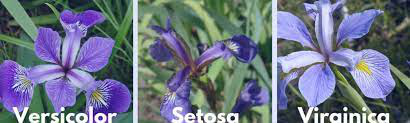

In [1]:
#show image of Iris

from PIL import Image

img = Image.open('iris.png',)
img

### Step 1 : Get Libraries

In [23]:
#Import Libraries

import numpy as np
import pandas as pd


###  Step 3 : Readng CSV file 

In [25]:
#creating Dataframe

df = pd.read_csv("Iris.csv")


In [26]:
#Show top 5 rows

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [15]:
#get sum of all null values columnwise

df.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [16]:
# Some Statsitical information

df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [17]:
# Some Statsitical information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


###  Step 4 : Data Visualisation

In [27]:
# import library for visualisation

import matplotlib.pyplot as plt
import seaborn as sns


### Variation of sepalLength in species

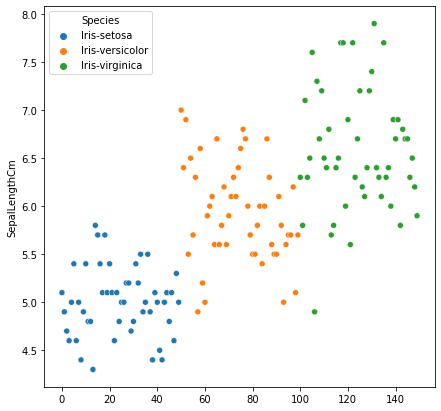

In [39]:
# using scatterplot to show the  variation 

plt.figure(figsize = (7, 7))
sns.scatterplot(x = df.index, y = df['SepalLengthCm'], hue = df['Species'])
plt.show()

### Visualising  the variation of petalLength on Species

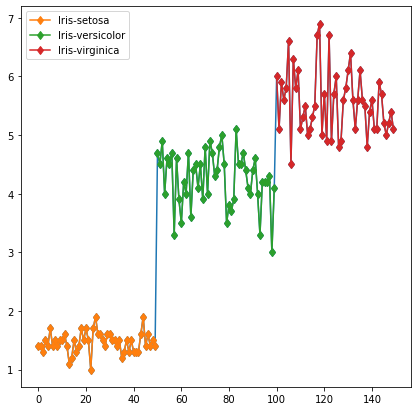

In [40]:
# Using the plot to show variation in petalLength in Species

plt.figure(figsize = (7,7))
plt.plot( df.index, df['PetalLengthCm'] , markevery = 1, marker = 'd' )
for name, group in df.groupby("Species"):
        plt.plot( group.index, group['PetalLengthCm'] , markevery = 1, marker = 'd' , label = name )
        
plt.legend()
plt.show()


### Striplot for ploting variation of petal Length

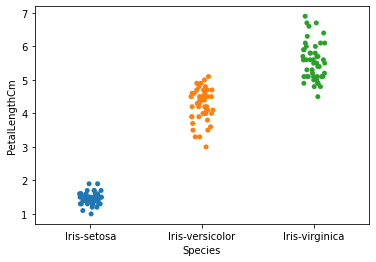

In [47]:
sns.stripplot(x = df['Species'], y = df['PetalLengthCm'])
plt.show()

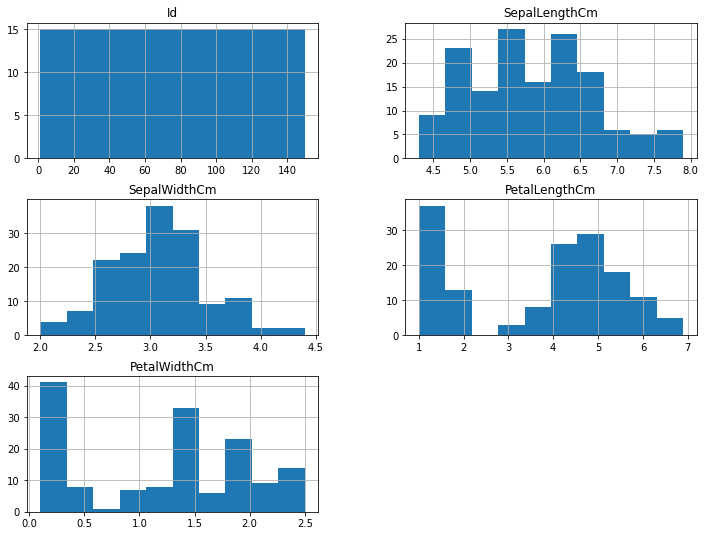

In [49]:
# draw Histogram to see the distribution of data

df.hist(figsize = (12, 9));

In [50]:
#corelation b/w atribute

df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


### Multivariate Analysis

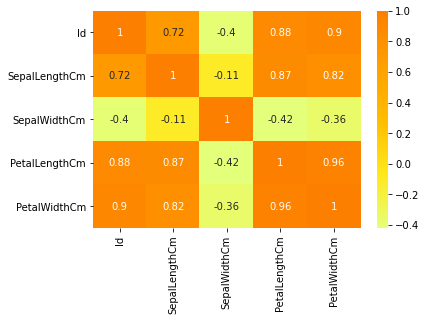

In [21]:
import seaborn as sns

sns.heatmap(df.corr(), annot = True, cmap = 'Wistia');

### Step 5:  Now split data into dependent and independent Category

In [22]:
#Independent Variable   X

X = df.iloc[ : , 0 : -1].values

print("Size of X ::", X.shape)

Size of X :: (150, 5)


In [18]:
#Dependent Variable   Y

y = df.iloc[ : , -1].values

print("Size of Y ::", y.shape)

Size of Y :: (150,)


# Finding  Optimal  number  of  K  

Text(0.5, 0, 'Number of cluster')

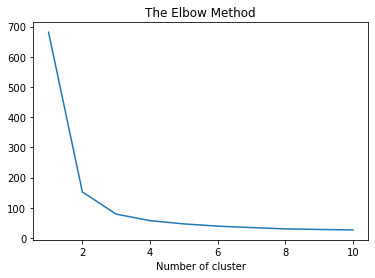

In [21]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# plotting the result into line graph

plt.plot(range(1,11), wcss, );
plt.title("The Elbow Method")
plt.xlabel("Number of cluster")



# Using Dendogram for finding the optimal number of clusters.

## Hirarchical Clustering

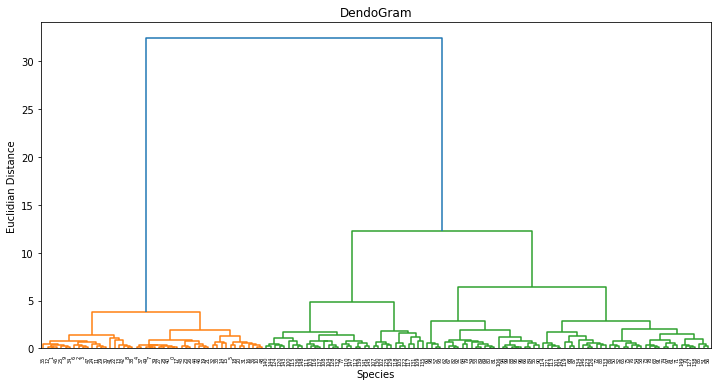

In [32]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12, 6))
dendogram = sch.dendrogram(sch.linkage(X, method = "ward" ))
plt.title("DendoGram")
plt.xlabel("Species")
plt.ylabel("Euclidian Distance")
plt.show()

# Creating K-Means Classifier

In [35]:

kmeans = KMeans(n_clusters=3, init="k-means++", max_iter = 300, n_init=10, random_state= 0)
y_kmeans = kmeans.fit_predict(X)

print("Predicted Values are : ", y_kmeans)


Predicted Values are :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


## Now Visualising the clusters

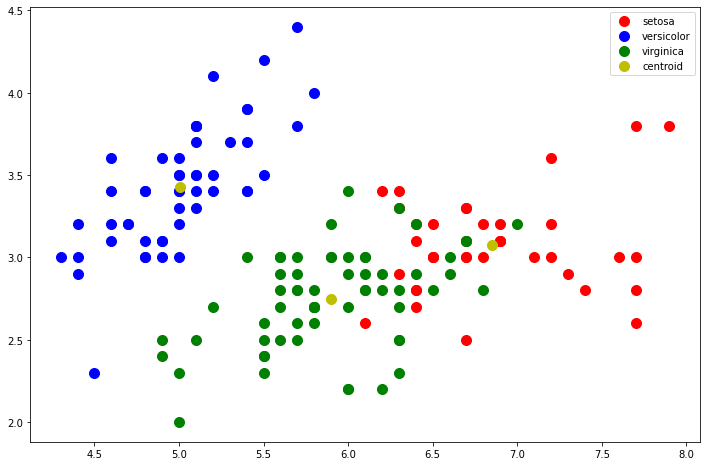

In [48]:
plt.figure(figsize=(12, 8))
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 100, c = "r", label = "setosa")
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 100, c = "b", label = "versicolor")
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 100, c = "g", label = "virginica")
plt.scatter(kmeans.cluster_centers_[: , 0], kmeans.cluster_centers_[:, 1] ,s = 100, c = 'y', label = "centroid")
plt.legend()